<a href="https://colab.research.google.com/github/ShuangAnatoli/Machine-Learning/blob/main/DecisionTrees/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Dataset

In [1]:
!pip install snapml
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
from __future__ import print_function
warnings.filterwarnings('ignore')

In [3]:
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pineapplesoup
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 130MB/s]


#Exploratory Data Analysis

In [4]:
df = pd.read_csv("creditcardfraud/creditcard.csv")

In [5]:
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")


There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


In [6]:
n_replicas = 10
big_raw_data = pd.DataFrame(np.repeat(df.values, n_replicas, axis = 0), columns = df.columns)
print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


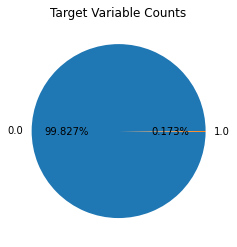

In [7]:
labels = big_raw_data.Class.unique()
sizes = big_raw_data.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct ="%1.3f%%")
ax.set_title("Target Variable Counts")
plt.show()

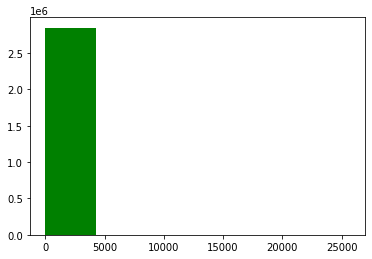

In [8]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

In [9]:
print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


#Data Preprocessing

In [10]:
big_raw_data.iloc[:,1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
data_matrix = big_raw_data.values
X = data_matrix[:, 1:30]
y = data_matrix [:, 30]
X = normalize(X, norm="l1")
print("X shape", X.shape)
print("y shape", y.shape)

X shape (2848070, 29)
y shape (2848070,)


#Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y )
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


#Build Decision Tree Model

In [12]:
w_train = compute_sample_weight('balanced', y_train)
from sklearn.tree import DecisionTreeClassifier
sklearn_dt = DecisionTreeClassifier(max_depth = 4, random_state = 35)
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight = w_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  39.72929


#Build Decision Tree Model with SnapML


In [13]:
from snapml import DecisionTreeClassifier
snapml_dt = DecisionTreeClassifier(max_depth =4, random_state = 45, n_jobs = 4)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  5.94406


#Evaluation


In [15]:
from os import XATTR_CREATE
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_pred = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))


[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.68x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


#Support Vector Machine Scikit Learn


In [17]:
from sklearn.svm import LinearSVC
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  70.92


#Support Vector Machine SnapML


In [18]:
from snapml import SupportVectorMachine
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[SnapML] Training time (s):  {0:.2f}".format(snapml_time))


[SnapML] Training time (s):  14.94


#Evaluating SVM

In [22]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_svm.decision_function(X_test)
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

snapml_pred = snapml_svm.decision_function(X_test)
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[SnapML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 4.75x 
[Scikit-Learn] ROC-AUC score:   0.984
[SnapML] ROC-AUC score:   0.985
